# **Creación de data tabular de la señales fisiológicas obtenidas en los laboratorios**

In [143]:
#Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [144]:
#Seleccionamos estilo de ploteo
plt.style.use("ggplot")

## Lectura de los datos

In [145]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt("ECG_ejercicio.txt", delimiter="\t")
array1

array([[  0.,   0.,   0., ...,   0., 468.,  nan],
       [  1.,   0.,   0., ...,   0., 455.,  nan],
       [  2.,   0.,   0., ...,   0., 448.,  nan],
       ...,
       [ 11.,   0.,   0., ...,   0., 625.,  nan],
       [ 12.,   0.,   0., ...,   0., 624.,  nan],
       [ 13.,   0.,   0., ...,   0., 619.,  nan]])

In [146]:
#Nos quedamos con el dato del sensor
d_sensor = array1[:,-2]
d_sensor = np.append(d_sensor, np.zeros(150))
d_sensor

array([468., 455., 448., ...,   0.,   0.,   0.])

In [147]:
len(d_sensor)

29700

## Graficación de los datos

(0.0, 5000.0)

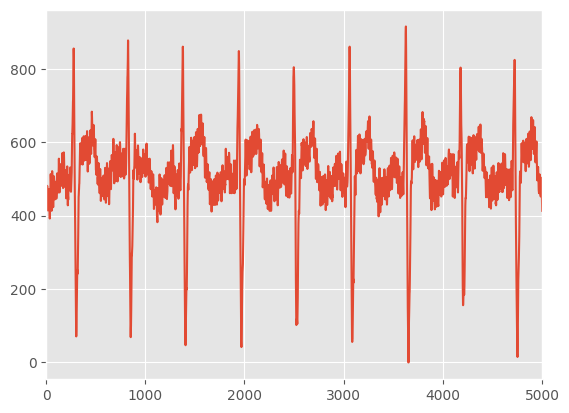

In [148]:
plt.plot(d_sensor)
plt.xlim(0,5000)

## Especificar la Frecuencia de muestreo 

In [149]:
Fs = 1000 #Frecuencia de muestreo del dispositivo de adquisición
Ts=1/Fs
n = np.arange(0,d_sensor.shape[0])  # t = n*Ts
t = n*Ts

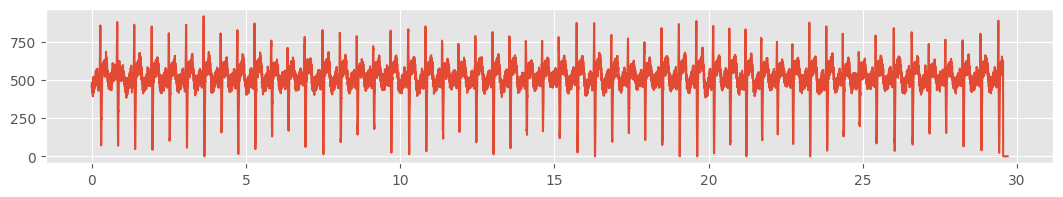

In [150]:
#Ploteamos la señal en el tiempo
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t, d_sensor)

## Pasando el array a pandas para trabajarlo como series de tiempo

In [151]:
#Pasamos las observaciones a filas correspondientes a una variable t y d_sensor
st_sensor = np.concatenate((t.reshape(-1,1),  d_sensor.reshape(-1,1)), axis=1)

In [152]:
#Creamos el data frame con las varibles t y d_sensor
df = pd.DataFrame(st_sensor, columns=["t","d_sensor"])
df.head()

,t,d_sensor
0,0.000,468.0
1,0.001,455.0
2,0.002,448.0
3,0.003,459.0
4,0.004,466.0


In [153]:
#Establecemos t como index 
df = df.set_index("t")
df.head()

,d_sensor
t,
0.000,468.0
0.001,455.0
0.002,448.0
0.003,459.0
0.004,466.0


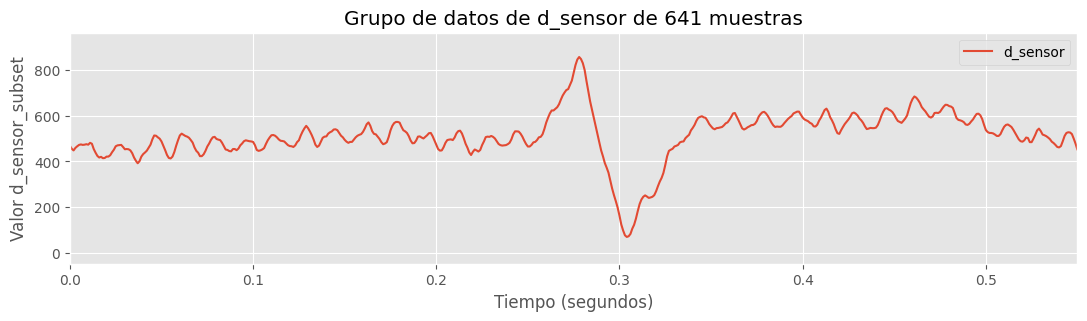

In [154]:
#Ploteamos la señal

df.plot(figsize=(13,3))
plt.xlim(0,0.55)
#####plt.plot(df.index, df.loc[936])#######
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Valor d_sensor_subset")  # Cambiar el nombre del eje y
plt.title("Grupo de datos de d_sensor de 641 muestras")  # Cambiar el título
plt.show()


## Pasando a data tabular estilo Sklearn

In [155]:
df.index.max()/0.55

53.99818181818182

In [156]:
df.shape[0]/54

550.0

In [157]:
d_obs = df["d_sensor"].values.reshape(54, 550)
d_obs

array([[468., 455., 448., ..., 519., 499., 477.],
       [451., 443., 440., ..., 470., 462., 453.],
       [441., 430., 430., ..., 505., 480., 458.],
       ...,
       [483., 472., 455., ..., 513., 499., 487.],
       [473., 455., 443., ..., 504., 488., 476.],
       [463., 452., 440., ...,   0.,   0.,   0.]])

<Figure size 1300x200 with 0 Axes>

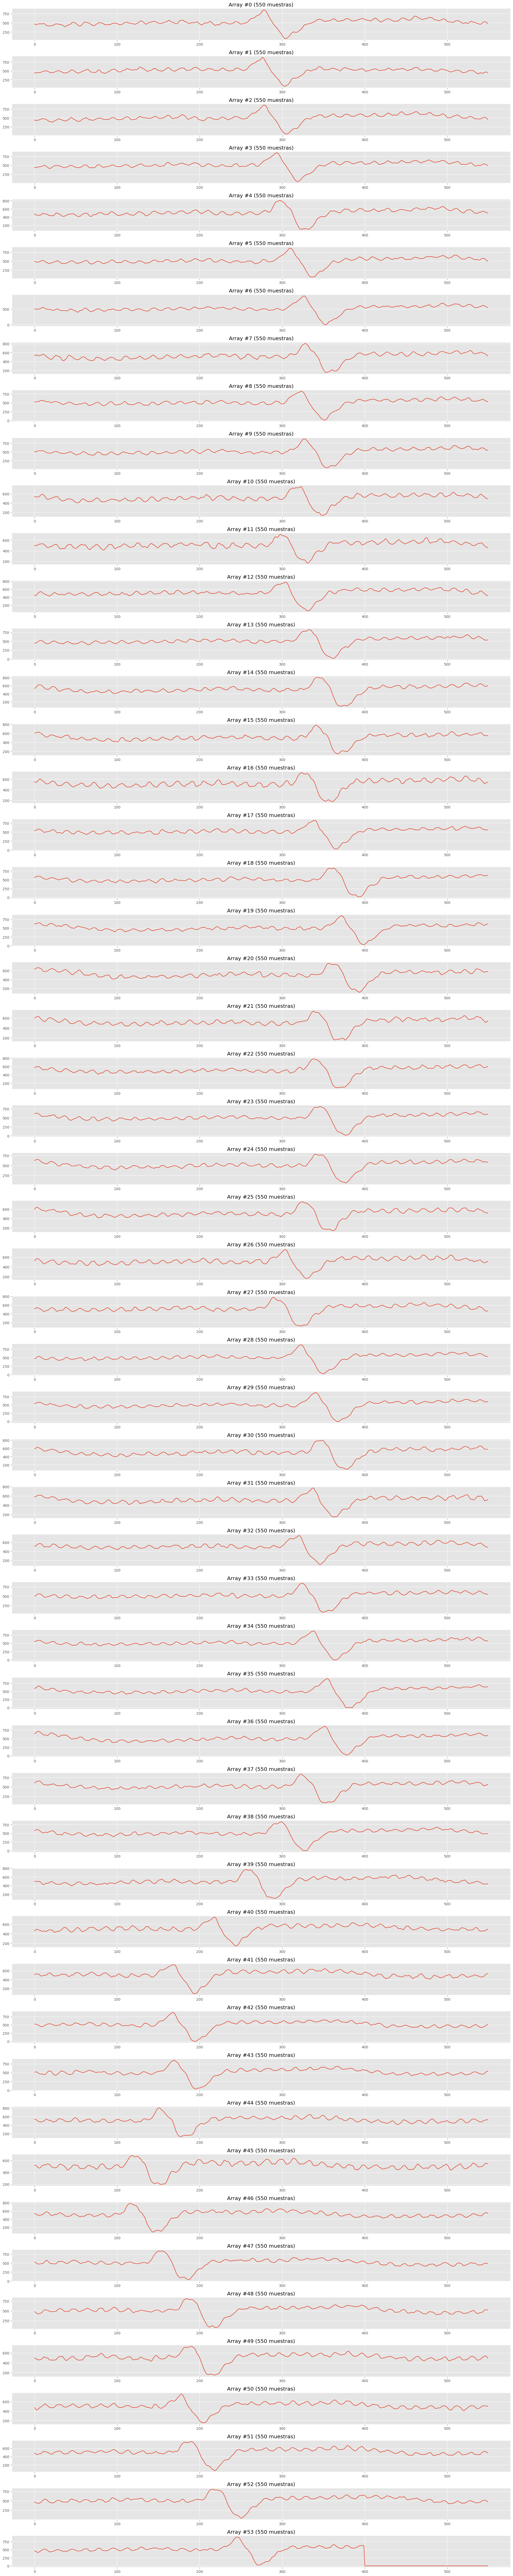

(54, 550)

In [158]:
plt.figure(figsize=(13,2))
#plt.plot(d_obs[53])

fig, axs = plt.subplots(nrows=54, figsize=(20, 100))

for i in range(54):
    axs[i].plot(d_obs[i])
    axs[i].set_title(f"Array #{i} (550 muestras)")
    
plt.tight_layout()
plt.show()

d_obs.shape

In [159]:
# Tamaño requerido para los subarrays
tamano_subarray = 680

# Agregar ceros al final de los subarrays en array1 y array2
d_obs = np.concatenate((d_obs, np.zeros((54, tamano_subarray - d_obs.shape[1]))), axis=1)
d_obs


array([[468., 455., 448., ...,   0.,   0.,   0.],
       [451., 443., 440., ...,   0.,   0.,   0.],
       [441., 430., 430., ...,   0.,   0.,   0.],
       ...,
       [483., 472., 455., ...,   0.,   0.,   0.],
       [473., 455., 443., ...,   0.,   0.,   0.],
       [463., 452., 440., ...,   0.,   0.,   0.]])

In [160]:
len(d_obs[1])

680

## Descripción de categoria de los ejercicios realizado en la clase de ECG

| Descripción | Categoria |
|----------|----------|
| Basal    | 0   |
| Respiracion   | 1   | 
| Post-Ejercicio    | 2   |


In [161]:
#array4 = np.concatenate((array3,  np.repeat(0, array3.shape[0]).reshape(-1,1)), axis=1)

# Creamos una categoría
target_2 = np.repeat(2, d_obs.shape[0])
target_2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [162]:
ecg_ejer = {"base": d_obs, "target": target_2}
ecg_ejer

{'base': array([[468., 455., 448., ...,   0.,   0.,   0.],
        [451., 443., 440., ...,   0.,   0.,   0.],
        [441., 430., 430., ...,   0.,   0.,   0.],
        ...,
        [483., 472., 455., ...,   0.,   0.,   0.],
        [473., 455., 443., ...,   0.,   0.,   0.],
        [463., 452., 440., ...,   0.,   0.,   0.]]),
 'target': array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2])}